# §1.2.6 Bayesian Curve Fitting

In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

from __future__ import unicode_literals, print_function
import six
import sys
import os
import math
import datetime as dt
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-whitegrid')

In [2]:
sys.version

'3.6.0 |Anaconda 4.3.0 (x86_64)| (default, Dec 23 2016, 13:19:00) \n[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]'

## Create dataset

In [3]:
def make_truth_data(func=lambda x: x):
    xs = np.arange(0, 1, 0.02)
    ys = func(xs)
    return xs, ys

def make_observed_data(func=lambda x: x, std=0.1):
    xs = np.arange(0, 1, 0.1)
    ys = func(xs) + np.random.normal(0, std, xs.size)
    return xs, ys

def sin(x):
    return np.sin(2*np.pi*x)

xs_truth, ys_truth = make_truth_data(sin)
xs_observ, ys_observ = make_observed_data(sin, std=0.1)

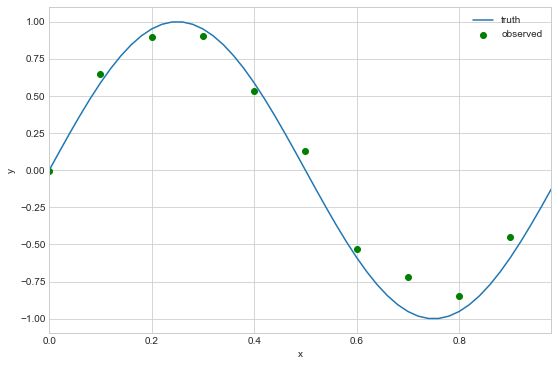

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,6))

axes.plot(xs_truth, ys_truth, label='truth')
axes.scatter(xs_observ, ys_observ, color='green', marker='o', label='observed')
axes.set_xlim(np.min(xs_truth), np.max(xs_truth))
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend()

## Design matrix

ここでの基底関数は $\phi_{i}(x) = x^{i}$ とする

In [5]:
def poly_features(xs, m=1):
    return np.asarray([np.power(xs, i) for i in six.moves.range(m+1)]).transpose()

In [6]:
poly_features(xs_observ, m=3)

array([[ 1.   ,  0.   ,  0.   ,  0.   ],
       [ 1.   ,  0.1  ,  0.01 ,  0.001],
       [ 1.   ,  0.2  ,  0.04 ,  0.008],
       [ 1.   ,  0.3  ,  0.09 ,  0.027],
       [ 1.   ,  0.4  ,  0.16 ,  0.064],
       [ 1.   ,  0.5  ,  0.25 ,  0.125],
       [ 1.   ,  0.6  ,  0.36 ,  0.216],
       [ 1.   ,  0.7  ,  0.49 ,  0.343],
       [ 1.   ,  0.8  ,  0.64 ,  0.512],
       [ 1.   ,  0.9  ,  0.81 ,  0.729]])

## Bayesian regression

In [26]:
class BayesianRegression(object):
    def __init__(self, m=1, alpha=0.001, beta=1.0):
        self.m = m
        self.alpha = alpha
        self.beta = beta

    def fit(self, xs, ts):
        phis = poly_features(xs, m=self.m)
        # (1.72)
        var_inv = self.alpha * np.identity(phis.shape[1]) + phis.T.dot(phis)
        self.var = np.linalg.inv(var_inv)
        # (1.70)
        self.mean = self.beta * self.var.dot(phis.T.dot(ts))

    def predict(self, xs):
        phis = poly_features(xs, m=self.m)
        y = phis.dot(self.mean)
        y_var = 1 / self.beta + np.sum(phis.dot(model.var.dot(phis.T)), axis=1)
        y_std = np.sqrt(y_var)
        return y, y_std

In [23]:
model = BayesianRegression(m=25)
model.fit(xs_observ, ys_observ)

In [24]:
ys_pred, ys_pred_std = model.predict(xs_truth)

/Users/uents/.anyenv/envs/pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in sqrt


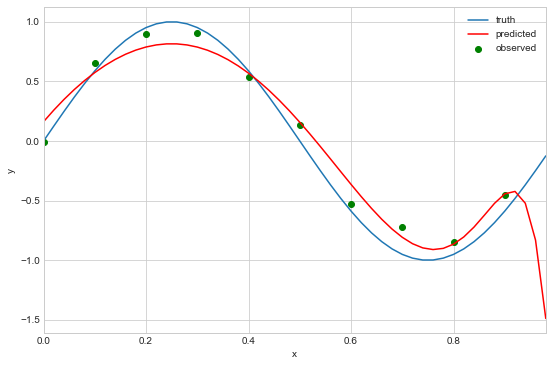

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
axes.plot(xs_truth, ys_truth, label='truth')
axes.scatter(xs_observ, ys_observ, color='green', marker='o', label='observed')
axes.plot(xs_truth, ys_pred, color='red', label='predicted')
axes.set_xlim(np.min(xs_truth), np.max(xs_truth))
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend()

In [ ]:
phis = poly_features(xs_observ, m=3)
phis.shape

In [ ]:
model.mean.shape

In [ ]:
phis.dot(model.mean)